# Explainable AI for Cardiovascular Health:  
## Understanding Heart Disease Causes and Black Box Model Decisions

**Research Team**: Tariq Razik, Andrey , Nathan , Kate  
**Supervision**: Prof. Thomas Setzer  
**Instruction**: Andre Konersmann

### Research Questions:
1. **Clinical Understanding**: What are thefeatures causeing heart disease?
2. **Model Interpretability**: Can current XAI methods effectively explain the decision-making process of black box models in Heart Disease prediction?
3. **Practical Application**: How can XAI techniques bridge the gap between model performance and clinical interpretability in healthcare?

In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Note , Since it's not fair that Preprocessing have been mostly Done , I would suggest an attempt for Feature Engineering.

Such As PolynomialFeatures : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html , mentioning that applying polynomial can linearlize the decision boundary if we applied enough transformations. => to make our model truly a BlackBox it might be a good idea but it might be bad when trying XAI because then our features won't be too much clear , these things we might get surprised with

As Andrey Did making compenations between features , even though it might be less effective since this will undermine the feature importance of the ones we currently have but it might increase the accuarcy.



In [59]:
#Tareq & Nathan
from sklearn.model_selection import train_test_split

HearDisease_csv = pd.read_csv('HeartDisease.csv')

X_train, X_test= train_test_split(HearDisease_csv, test_size=0.99,random_state=48)

#The purpose is to keep all X_train , X_test split in order to make DataCleaning as clean as possible
#Note : since Our Dataset is too Big , making test_size = 0.9 will help our computers in model tuning

# Drop Our Target_Variables in addition to applying trnasformation


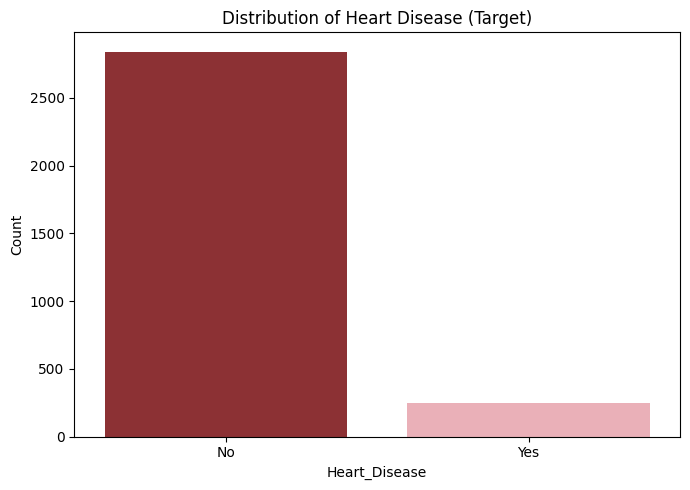

In [60]:
# Andrie & Tareq
plt.figure(figsize=(7, 5))
_ = sns.countplot(data=X_train, x='Heart_Disease', palette=['#9B2226', '#F4A6B1'] , hue='Heart_Disease')

plt.xlabel("Heart_Disease")
plt.ylabel("Count")
plt.title("Distribution of Heart Disease (Target)")
plt.tight_layout()
plt.show()


Our Work only Based on Training Data - we Only learn from the training data, and keep the test data completely separate until the very end Visualization methods Only applicable on X_train , y_train Otherwise We as Our model will be Overfitting

Kate & Andrey Needs to add this


At only the training Set

In [61]:
# Andrie & Tareq
from IPython.display import Math
from IPython.display import Markdown

height_mean ,height_std = int(X_train['Height_(cm)'].mean()) , int(X_train['Height_(cm)'].std())

weight_mean ,weight_std = int(X_train['Weight_(kg)'].mean()) , int(X_train['Weight_(kg)'].std())

In [62]:
# Andrie & Tareq
display(
    Markdown("### Feature Distributions"),

    Markdown("The training data shows the Height normally distrbuted:"),
    Math(fr'Height \sim \mathcal{{N}}(\mu = {height_mean},\,\sigma= {height_std})'),
)

display(
    Markdown("The training data shows the Weight normally distrbuted:"),
    Math(fr'Height \sim \mathcal{{N}}(\mu = {weight_mean},\,\sigma= {weight_std})'),
    Markdown("Confirming Our dataset Quality due to it matching our Expectation on Height and Weight Distrbutions in adult humans")
)

#Note , This relates to the part of clinical plausability explained in Evaluation by our Data Analysis Specialist Mr Andrei
#Note , another Observation we can make is Weight_Std > Height_Std this also matches our expectation since usualy humans tend to have greater difference in Weight than Hieght
#Note , Also Its shown by the Graph above where you can see the Yellow line more flat than Blue

### Feature Distributions

The training data shows the Height normally distrbuted:

<IPython.core.display.Math object>

The training data shows the Weight normally distrbuted:

<IPython.core.display.Math object>

Confirming Our dataset Quality due to it matching our Expectation on Height and Weight Distrbutions in adult humans

<Figure size 1200x1500 with 0 Axes>

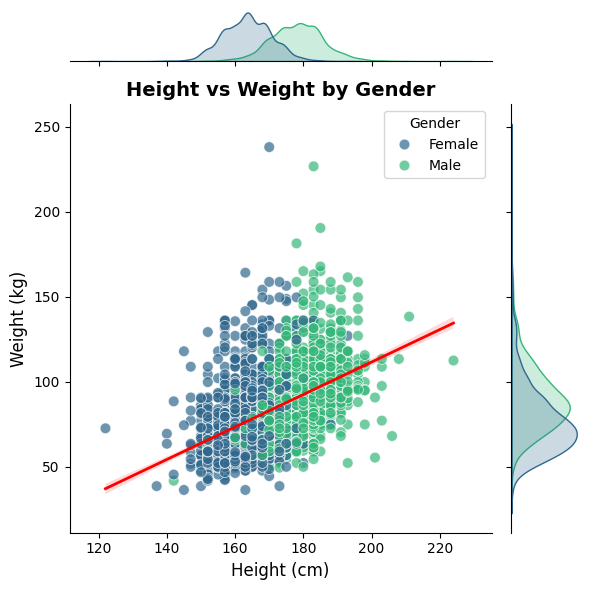

In [63]:
# Andrey & Tareq 
plt.figure(figsize=(12, 15))
sns.jointplot(data=X_train, x='Height_(cm)', y='Weight_(kg)', hue='Sex',
                palette='viridis', s=60, alpha=0.7)

sns.regplot(data=X_train, x='Height_(cm)', y='Weight_(kg)',
            scatter=False,
            line_kws={'color': 'red', 'linewidth': 2, 'label': 'Regression Line'})
plt.xlabel('Height (cm)', fontsize=12)
plt.ylabel('Weight (kg)', fontsize=12)
plt.title('Height vs Weight by Gender', fontsize=14, fontweight='bold')  # Updated title
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

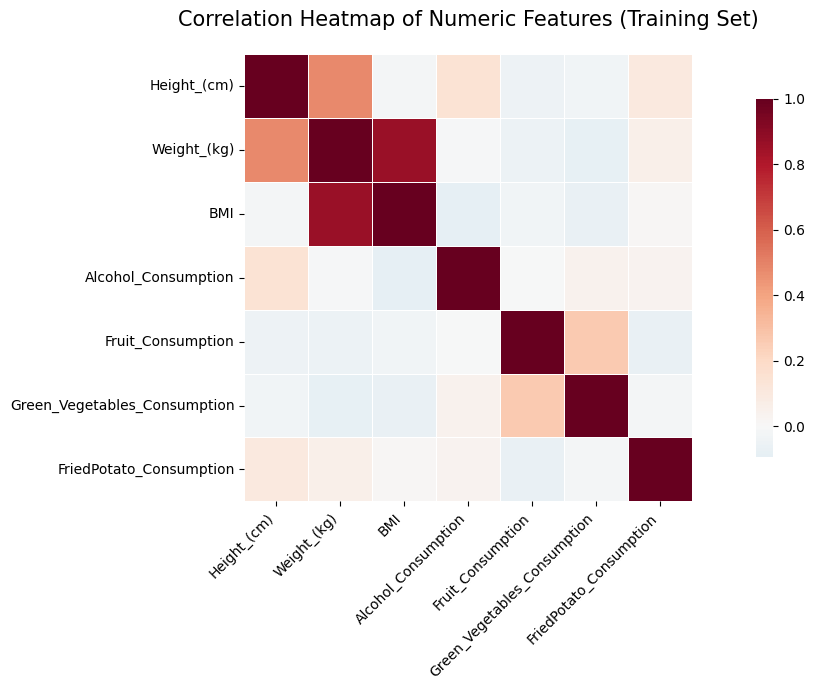

In [64]:
# Andrey & Kate
import numpy as np
corr = X_train.select_dtypes(include=np.number).corr()

plt.figure(figsize=(13, 7))

sns.heatmap(
    corr,
    cmap="RdBu_r",
    center=0,
    linewidths=0.5,
    linecolor="white",
    cbar_kws={'shrink': 0.8},
    square=True,
)

plt.title("Correlation Heatmap of Numeric Features (Training Set)", fontsize=15, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Try to mention About Correlation between Height And BMI and how it's not related to Height as much as Weight 
Hint , Correlation represents linear relationship

Kate & Andrey Please add

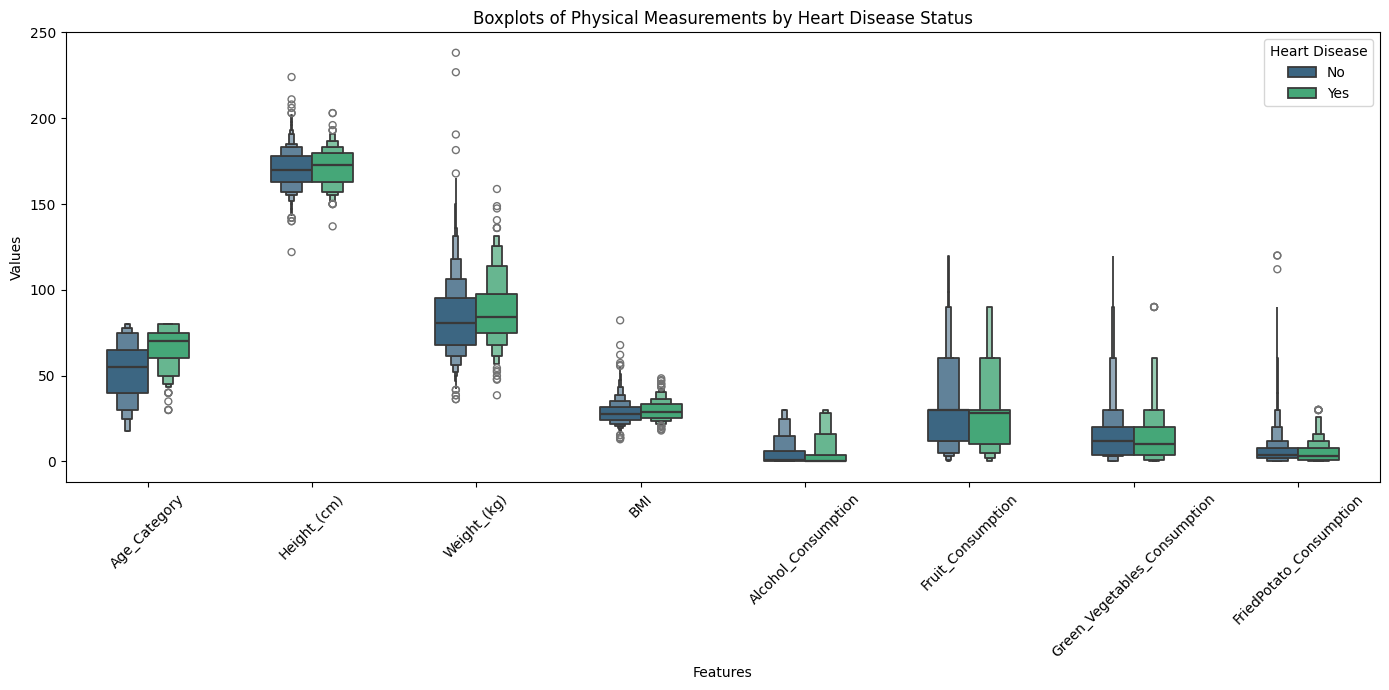

In [65]:
# Preprocessing Tareq
unique_values = X_train['Age_Category'].unique() # Look at all possible feature variables Notice smalles 18-24 largest 80+ , we only pick first two charckters and make them integer

age_category = {value:int(value[:2]) for value in unique_values} # value : int(value[:2]) => min(value) takes only the first two charckters notice all numbers are from at least two

X_train['Age_Category'] , X_test['Age_Category'] = X_train['Age_Category'].map(age_category) , X_test['Age_Category'].map(age_category) # apply map to both

# Andrey & Tareq 
plt.figure(figsize=(14,7))
numerical_features = X_train.select_dtypes(include=np.number).columns # It's funny how it's used later

plot_data = X_train.melt(id_vars=['Heart_Disease'],
                        value_vars=numerical_features,
                        var_name='Features',
                        value_name='Values')

sns.boxenplot(data=plot_data, x='Features', y='Values', hue='Heart_Disease',
              width=0.5, palette='viridis', linewidth=1.3)
plt.xlabel('Features')
plt.title("Boxplots of Physical Measurements by Heart Disease Status")
plt.ylabel('Values')
plt.xticks(fontsize=10, rotation=45)
plt.legend(title='Heart Disease')
plt.tight_layout()
plt.show()

In [66]:
X_train.describe() # Kate & Andrey

,Age_Category,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,3088.000000,3088.000000,3088.000000,3088.000000,3088.000000,3088.000000,3088.000000,3088.000000
mean,53.190738,170.580635,83.476104,28.594971,4.975389,29.917098,15.332254,6.506153
std,17.783846,10.474241,21.066709,6.395079,8.134481,24.196801,15.746793,8.820895
min,18.000000,122.000000,36.290000,12.920000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,163.000000,68.040000,24.280000,0.000000,12.000000,4.000000,2.000000
50%,55.000000,170.000000,81.650000,27.460000,1.000000,30.000000,12.000000,4.000000
75%,70.000000,178.000000,95.250000,31.750000,5.000000,30.000000,20.000000,8.000000
max,80.000000,224.000000,238.140000,82.230000,30.000000,120.000000,120.000000,120.000000


Notice , Heart Disease on Weight tend to have mean for Weight & BMI,From first Sight We see that healthy food happits doesn't effect on having Heart problems or not.

This plot ends all Visualization and problably give us an excuse to remove numerical features relation to the target variable such as alcohol Consumption , fried Potato ...

Notice also in general , usualy people having heart disease tend to drink more than these who don't

Finally , it's important to mention Biases for example how in people answers for example Girls usualy trying to look younger and boys trying to look richer.

And to denay these accusations by mentioning our data relations to real world and maybe even going towatd where it have been collected while mentioning evaluation

Kate & Andrey please edit here


### We want to use it for sure for the document , it's very compact with too much **information**

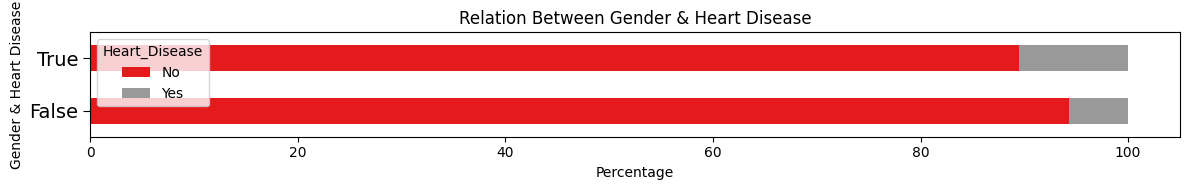

In [67]:
# PreProcessing Tareq
X_train['Sex'] , X_test['Sex'] = X_train['Sex'].map({'Male':True ,'Female':False}) , X_test['Exercise'].map({'Male':True ,'Female':False})

# Andrey & Tareq
counts = X_train.groupby('Sex')['Heart_Disease'].value_counts(normalize=True).mul(100).unstack()

counts.plot.barh(stacked=True, colormap='Set1', figsize=(12, 2))
plt.xlabel('Percentage')
plt.ylabel('Gender & Heart Disease')
plt.title('Relation Between Gender & Heart Disease')
plt.tick_params(axis='y', which='major', labelsize=14, labelrotation=0, length=5)
plt.tight_layout()
plt.show();

Notice , Male have higher chance into getting heart Disease much more than female => it's nice to mention why from clinical prespective such as cromisom things XY Versus XX => XX fixes genatic problems versus XY which doesn't

We put it as a proof into our Observations.
Andrey & Kate : Please Put explantions here

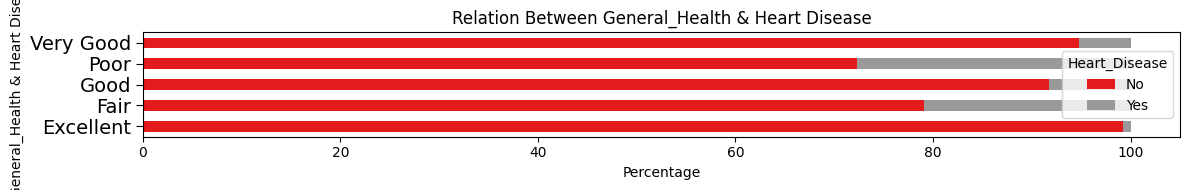

In [68]:
#Andrey & Tareq
counts = X_train.groupby('General_Health')['Heart_Disease'].value_counts(normalize=True).mul(100).unstack()

counts.plot.barh(stacked=True, colormap='Set1', figsize=(12, 2))
plt.xlabel('Percentage')
plt.ylabel('General_Health & Heart Disease')
plt.title('Relation Between General_Health & Heart Disease')
plt.tick_params(axis='y', which='major', labelsize=14, labelrotation=0, length=5)
plt.tight_layout()
plt.show();

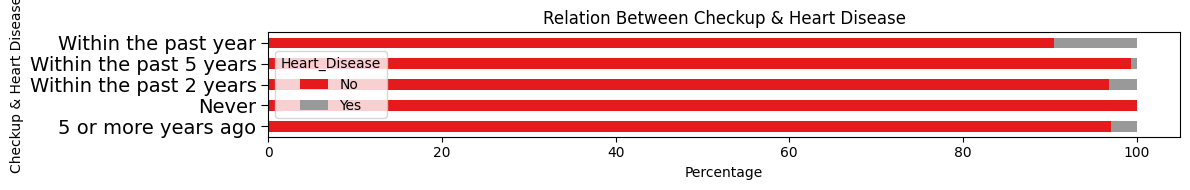

In [69]:
# Andrey & Tareq
counts = X_train.groupby('Checkup')['Heart_Disease'].value_counts(normalize=True).mul(100).unstack()

counts.plot.barh(stacked=True, colormap='Set1', figsize=(12, 2))
plt.xlabel('Percentage')
plt.ylabel('Checkup & Heart Disease')
plt.title('Relation Between Checkup & Heart Disease')
plt.tick_params(axis='y', which='major', labelsize=14, labelrotation=0, length=5)
plt.tight_layout()
plt.show();

Kate & Andrey Edit Your explantion here

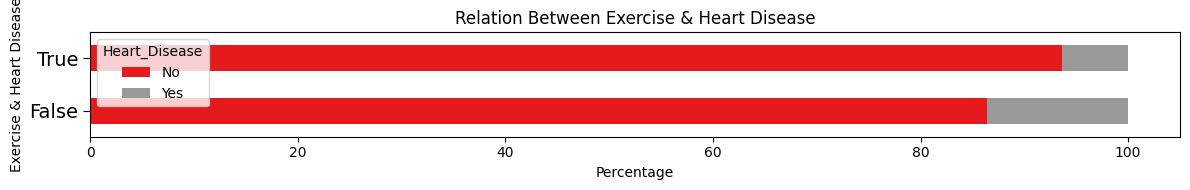

In [70]:
# Preprocessing Tareq
X_train['Exercise'] , X_test['Exercise'] = X_train['Exercise'].map({'Yes':True ,'No':False}) , X_test['Exercise'].map({'Yes':True ,'No':False})
# Andrey & Tareq
counts = X_train.groupby('Exercise')['Heart_Disease'].value_counts(normalize=True).mul(100).unstack()

counts.plot.barh(stacked=True, colormap='Set1', figsize=(12, 2))
plt.xlabel('Percentage')
plt.ylabel('Exercise & Heart Disease')
plt.title('Relation Between Exercise & Heart Disease')
plt.tick_params(axis='y', which='major', labelsize=14, labelrotation=0, length=5)
plt.tight_layout()
plt.show();

Please Explain Here

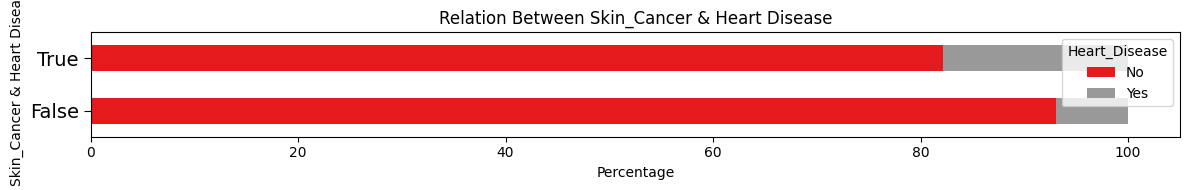

In [71]:
# Preprocessing Tareq
X_train['Skin_Cancer'] , X_test['Skin_Cancer'] = X_train['Skin_Cancer'].map({'Yes':True ,'No':False}),X_test['Skin_Cancer'].map({'Yes':True ,'No':False})

# Andrey & Tareq
counts = X_train.groupby('Skin_Cancer')['Heart_Disease'].value_counts(normalize=True).mul(100).unstack()

counts.plot.barh(stacked=True, colormap='Set1', figsize=(12, 2))
plt.xlabel('Percentage')
plt.ylabel('Skin_Cancer & Heart Disease')
plt.title('Relation Between Skin_Cancer & Heart Disease')
plt.tick_params(axis='y', which='major', labelsize=14, labelrotation=0, length=5)
plt.tight_layout()
plt.show();

Andrey & Kate : Please Explain here

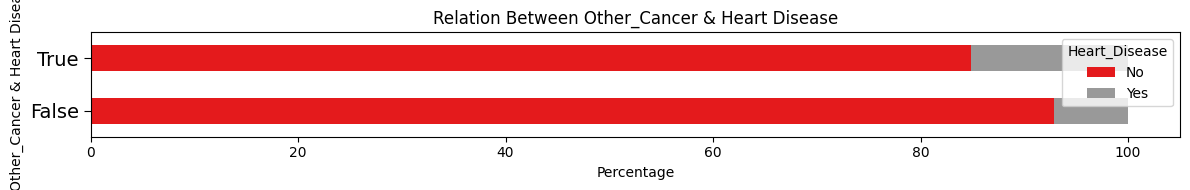

In [72]:
#Preprocessing Tareq
X_train['Other_Cancer'] , X_test['Other_Cancer'] = X_train['Other_Cancer'].map({'Yes':True ,'No':False}),X_test['Other_Cancer'].map({'Yes':True ,'No':False})

# Andrey & Tareq
counts = X_train.groupby('Other_Cancer')['Heart_Disease'].value_counts(normalize=True).mul(100).unstack()

counts.plot.barh(stacked=True, colormap='Set1', figsize=(12, 2))
plt.xlabel('Percentage')
plt.ylabel('Other_Cancer & Heart Disease')
plt.title('Relation Between Other_Cancer & Heart Disease')
plt.tick_params(axis='y', which='major', labelsize=14, labelrotation=0, length=5)
plt.tight_layout()
plt.show();

Andrey & Kate : Please Explain here

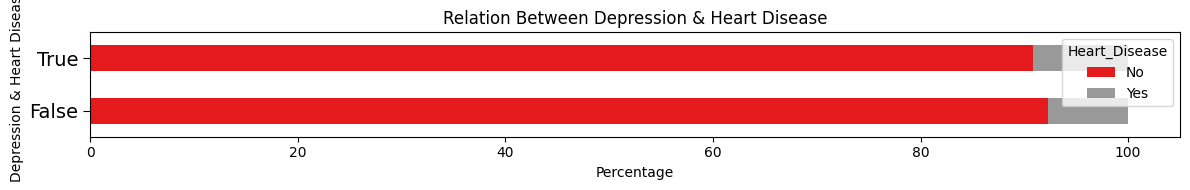

In [73]:
#Preprocessing Tareq
X_train['Depression'] , X_test['Depression'] = X_train['Depression'].map({'Yes':True ,'No':False}),X_test['Depression'].map({'Yes':True ,'No':False})

# Andrey & Tareq
counts = X_train.groupby('Depression')['Heart_Disease'].value_counts(normalize=True).mul(100).unstack()

counts.plot.barh(stacked=True, colormap='Set1', figsize=(12, 2))
plt.xlabel('Percentage')
plt.ylabel('Depression & Heart Disease')
plt.title('Relation Between Depression & Heart Disease')
plt.tick_params(axis='y', which='major', labelsize=14, labelrotation=0, length=5)
plt.tight_layout()
plt.show();

Andrey & Kate : Please Explain here

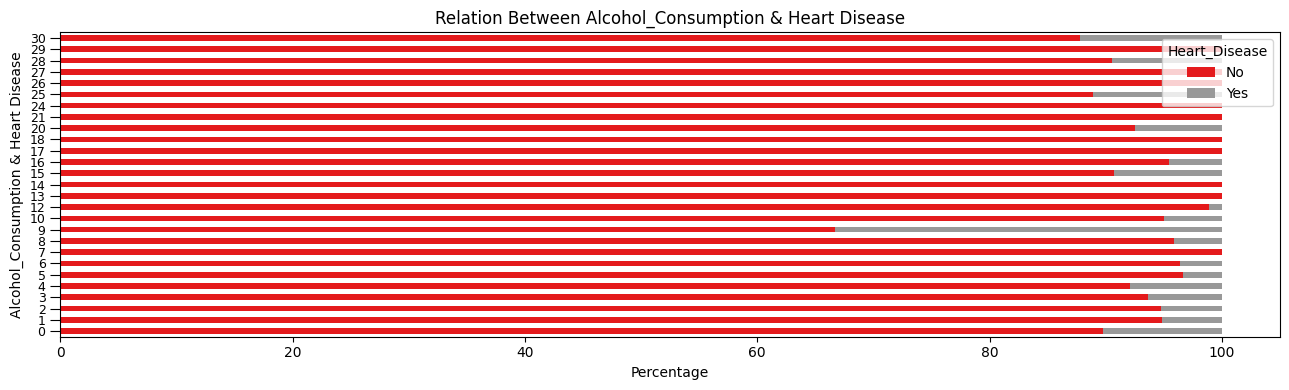

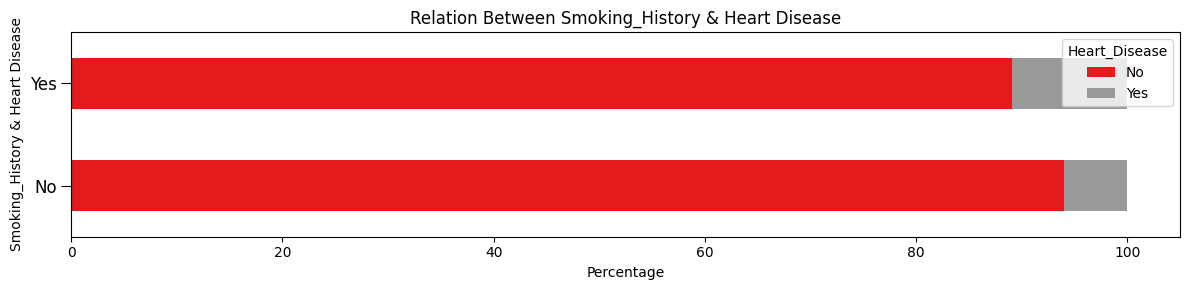

In [74]:
#Andrey 
counts = X_train.groupby('Alcohol_Consumption')['Heart_Disease'].value_counts(normalize=True).mul(100).unstack()
counts.plot.barh(stacked=True, colormap='Set1', figsize=(13, 4))
plt.xlabel('Percentage')
plt.ylabel('Alcohol_Consumption & Heart Disease')
plt.title('Relation Between Alcohol_Consumption & Heart Disease')
plt.tick_params(axis='y', which='major', labelsize=9, labelrotation=0, length=7)
plt.tight_layout()
plt.show();

#No longer Needed But might be nice to look at
######################################################################################################################


X_train['Smoking_History'].map({'Yes':True,'No':False}),X_test['Smoking_History'].map({'Yes':True,'No':False})
counts = X_train.groupby('Smoking_History')['Heart_Disease'].value_counts(normalize=True).mul(100).unstack()
counts.plot.barh(stacked=True, colormap='Set1', figsize=(12, 3))
plt.xlabel('Percentage')
plt.ylabel('Smoking_History & Heart Disease')
plt.title('Relation Between Smoking_History & Heart Disease')
plt.tick_params(axis='y', which='major', labelsize=12, labelrotation=0, length=7)
plt.tight_layout()
plt.show();

Please Explain Here

In [75]:
# Tareq & Nathan 
y_train ,y_test = X_train.pop('Heart_Disease') , X_test.pop('Heart_Disease') #Target Our Tareq Variable 
y_train , y_test = y_train.map({'Yes':True ,'No':False}) , y_test.map({'Yes':True,'No':False}) # Apply Transformation

In [133]:
# Define required Libraries Tareq & Nathan 
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# Only choose categorical_features
categorical_features = X_train.select_dtypes(include=object).columns

# Feature Engineering Tareq , Nathan you can add your name if you wanted to apply same transformations
poly_transform = PolynomialFeatures(degree=3,include_bias=False)
one_hot=OneHotEncoder(sparse_output=True,handle_unknown='ignore',max_categories=25) # Since We aren't Allowed to look at our X_test therefore set it to ignore
                    #Sparse_output :True Might cause trouble depending on scaler method {MinMaxScaler} choice => Sparse Save alots of memory

most_occur = SimpleImputer(strategy = 'most_frequent') # This is supposed to replace all Nan,np.nan ect with most frequent value

# Transformations Tareq Part , if nathan want to use same transformations then add your name but please try to explore before doing that
transformation = make_column_transformer(
    (make_pipeline(
        most_occur,
        one_hot
    ), categorical_features),
    
    (make_pipeline(
        most_occur,
        StandardScaler(),
        poly_transform
    ), numerical_features)
)

    

pipeline = Pipeline([
    ('preprocessor', transformation),                    # i am not highly against choosing to drop samples from the majority class => increases training speed
    (('sample',SMOTE(random_state=42, k_neighbors=2))), # Only for handling unbalanced , otherwise then randomly drop samples 
    ('classifier', MLPClassifier())
])

In [134]:
from sklearn.metrics import f1_score
# Tareq's Model 
grid_parameters = {
    'classifier__hidden_layer_sizes': [(30, 20, 10,5) ,(10, 7, 5),(10,5,3) ],
    'classifier__alpha': [0.01,0.001, 0.0001],
    'classifier__learning_rate_init': [0.001],
    'classifier__max_iter': [2000,1000],
    'classifier__early_stopping': [True],
    'classifier__n_iter_no_change': [30],
}

grid_search = GridSearchCV(pipeline, grid_parameters, cv=3,scoring="f1",n_jobs=-1)
grid_search.fit(X_train, y_train)

,estimator,Pipeline(step...lassifier())])
,param_grid,"{'classifier__alpha': [0.01, 0.001, ...], 'classifier__early_stopping': [True], 'classifier__hidden_layer_sizes': [(30, ...), (10, ...), ...], 'classifier__learning_rate_init': [0.001], ...}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('pipeline-1', ...), ('pipeline-2', ...)]"


In [135]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import f1_score
# Tareq's Model 
MLPClassifier_best_parameters = grid_search.best_params_

print("Best Parameters : ",MLPClassifier_best_parameters)
MLPClassifier_neighboor_best_module=grid_search.best_estimator_


scores = cross_validate(MLPClassifier_neighboor_best_module, X_train, y_train, return_train_score=True,cv=3)

test_accuarcy=scores["test_score"]
train_accuarcy=scores["train_score"]


Best Parameters :  {'classifier__alpha': 0.0001, 'classifier__early_stopping': True, 'classifier__hidden_layer_sizes': (10, 5, 3), 'classifier__learning_rate_init': 0.001, 'classifier__max_iter': 1000, 'classifier__n_iter_no_change': 30}


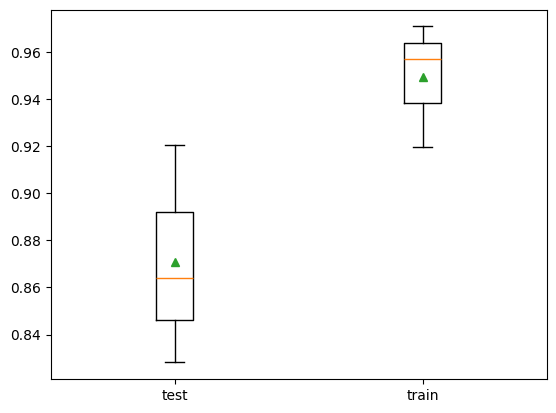

In [136]:
# Tareq's Model
plt.boxplot([test_accuarcy, train_accuarcy], tick_labels=["test", "train"], showmeans=True)
plt.show()

Predictions: [False False False ... False False False]


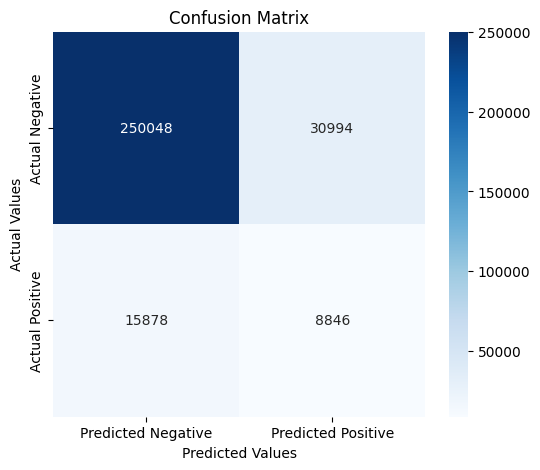

In [137]:
# Tareq's Model
y_hat = MLPClassifier_neighboor_best_module.predict(X_test)
print("Predictions:", y_hat)

cm = confusion_matrix(y_test, y_hat)

cm_df = pd.DataFrame(cm,
                     index=['Actual Negative', 'Actual Positive'], 
                     columns=['Predicted Negative', 'Predicted Positive'])

plt.figure(figsize=(6, 5))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [132]:
# Nathan's Model 